In [24]:
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

import pandas as pd
from pickle import load, dump

from keras import metrics
import keras.backend as K
from keras.layers import *
from keras.layers.core import *
from keras.layers.recurrent import *
from keras.layers.merge import *
from keras.layers.convolutional import *
from keras.layers.embeddings import *
from keras.layers.wrappers import *
from keras.layers.normalization import *
from keras.layers.advanced_activations import *
from keras.models import *
from keras.callbacks import *
from keras.utils.vis_utils import *

from IPython.display import SVG
import matplotlib.pyplot as plt

In [2]:
num_train = 2000

In [4]:
num_marks = 5
length_bin = 100
num_filters = 50
length_filter = 10
length_pool = 5
length_full_1 = 625
length_full_2 = 125

In [12]:
Xtrain = np.random.random((num_train, length_bin, num_marks))
Ytrain = np.random.randint(2, size=(num_train))

In [32]:
Xtest = np.random.random((num_train, length_bin, num_marks))
Ytest = np.random.randint(2, size=num_train)

In [31]:
print(f"train, X size: {Xtrain.shape}, Y size: {Ytrain.shape}")
print(f"test, X size: {Xtest.shape}, Y size: {Ytest.shape}")

train, X size: (2000, 100, 5), Y size: (2000,)
test, X size: (2000, 100, 5), Y size: (2000,)


# Model define

In [22]:
%%time 
# channel last
input_shape = (length_bin, num_marks)
input = Input(shape=input_shape)

nn = Conv1D(num_filters, length_filter, padding='same', activation="relu")(input)
nn = MaxPooling1D(length_pool, strides=length_pool, padding='same')(nn)
nn = Dropout(0.5)(nn)
nn = Flatten()(nn)
nn = Dense(length_full_1, activation="relu")(nn)
nn = Dense(length_full_2, activation="relu")(nn)
nn = Dense(1, activation="sigmoid")(nn)


clf = Model(inputs=input, outputs=nn)
clf.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

CPU times: user 192 ms, sys: 4 ms, total: 196 ms
Wall time: 196 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100, 5)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 50)           2550      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 50)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 625)               625625    
_________________________________________________________________
dense_5 (Dense)              (None, 125)               78250     
__________

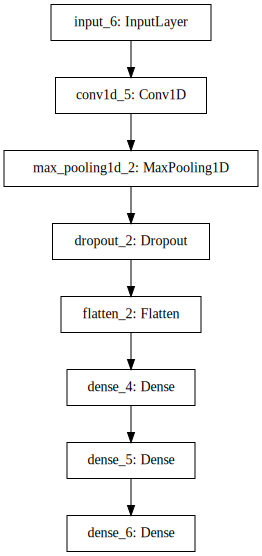

In [23]:
clf.summary()
SVG(model_to_dot(clf).create(prog='dot', format='svg'))

In [37]:
run_name = "deepchrome 3"
tb = TensorBoard(log_dir=f"../log/{run_name}", batch_size=32, write_graph=True)
checkpointer = ModelCheckpoint(filepath=f"../model/{run_name}.h5", verbose=1, save_best_only=True, monitor="val_acc")
stopper = EarlyStopping(monitor="val_acc", patience=3)

In [38]:
clf.fit(
    Xtrain,
    Ytrain,
    batch_size=2000,
    callbacks = [tb, checkpointer],
    epochs=10,
    shuffle=True,
    validation_data=(Xtest, Ytest),
    verbose=0)

Epoch 00000: val_acc improved from -inf to 0.48800, saving model to ../model/deepchrome 3.h5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc improved from 0.48800 to 0.49750, saving model to ../model/deepchrome 3.h5
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
